In [2]:
import matplotlib.pyplot as plot
import numpy as np

In [22]:
rawData = np.loadtxt("VShock.dat", skiprows=2)
time, R_s, V_s = rawData.T

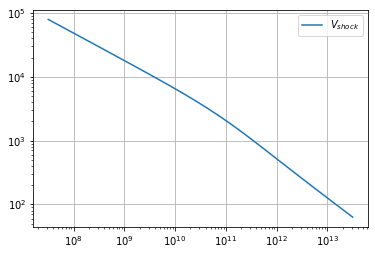

In [23]:
plot.clf()
plot.plot(time*3.17098*10**-8, V_s*10**-5, label=r"$V_{shock}$")

plot.xscale("log")
plot.yscale("log")
plot.grid()
plot.legend()
plot.show()

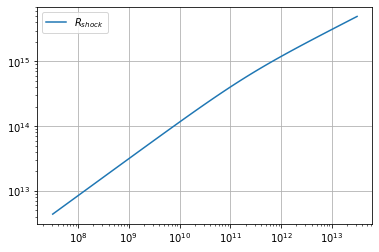

In [24]:
plot.clf()
plot.plot(time*3.17098*10**-8, R_s*10**-5, label=r"$R_{shock}$")

plot.xscale("log")
plot.yscale("log")
plot.grid()
plot.legend()
plot.show()